<a href="https://colab.research.google.com/github/KhalidMansoor0310/ML_Deep_learning_beginner_projects/blob/main/DecisionTree_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = '/content/sample_data/titanic.csv'
df = pd.read_csv(path)
# df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# drop other columns
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [ ]:
X = df.drop(['Survived'],axis=True)
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [ ]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X.Sex = X.Sex.map({'male': 1, 'female': 2})

In [ ]:
X.Age = X.Age.fillna(X.Age.mean())
# X.info()
X.head(5)

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [ ]:
# len(X_train)
len(X_test)

179

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# y_predicted = model.predict(X_test)
# model.predict([[1,2,38,71]])

array([1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[90, 17],
       [19, 53]])

Text(24.0, 0.5, 'actual')

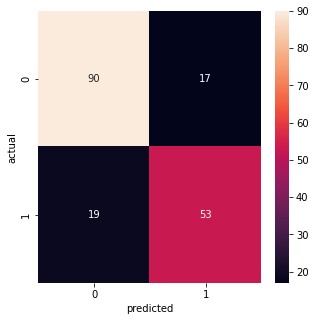

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [ ]:
model.score(X_test,y_test)

0.7988826815642458